In [1]:
from tes.data import Data,PacketStream,Packet,Payload,EventFlags,Event
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#NOTE traces[0] corresponts to clk=1
trace_dt=np.dtype([('value','i4')])
stream_dt=np.dtype([('data','>i8'),('clk','i4')])

In [13]:
traces=Data.fromfile('traces',trace_dt,'teslib','mca_unit_TB',tool='vivado')
traces=traces[2:]
stream=Data.fromfile('stream',stream_dt,'teslib','mca_unit_TB',tool='vivado')

In [14]:
lasts=np.where(stream['clk']<0)[0]+1
lasts

array([  8197,  16394,  24591,  32788,  40985,  49182,  57379,  65576,
        73773,  81970,  90167,  98364, 106561, 114758, 122955, 131152,
       139349, 147546, 155743, 163940, 172137, 180334, 188531, 196728,
       204925, 213122, 221319, 229516, 237713, 245910], dtype=int64)

In [15]:
from tes.mca import Distribution
lasts=np.where(stream['clk']<0)[0]+1
first=np.uint64(0)
c=0
for last in lasts:
    frame=np.copy(stream['data'][first:last]).view(np.uint8)
    first=last
    d=Distribution(frame)
                  
    stop=d.stop_time+np.uint64(1)
    start=d.start_time #+np.uint64(1)
    bins=np.zeros((d.last_bin+1,),dtype=np.uint32)
    
    for i in range(start,stop):
        s = traces['value'][i]
        if s < d.lowest_value:
            bins[0] += 1
        else:
            bin_number = s - d.lowest_value + 1
            if bin_number < d.last_bin:
                bins[bin_number] += 1
            else:
                bins[d.last_bin] += 1

    bad=(bins-d.counts).nonzero()[0]
    if len(bad):
        print('{:},bad dist start:{:} stop:{:}'.format(c,d.start_time,d.stop_time))
        print(bad)
    else:
        print('{:},good dist start:{:} stop:{:}'.format(c,d.start_time,d.stop_time))
        
    c+=1

0,good dist start:32769 stop:65536
1,good dist start:65537 stop:229376
2,good dist start:229377 stop:393216
3,good dist start:393217 stop:557056
4,good dist start:557057 stop:720896
5,good dist start:720897 stop:884736
6,good dist start:884737 stop:1048576
7,good dist start:1048577 stop:1212416
8,good dist start:1212417 stop:1376256
9,good dist start:1376257 stop:1540096
10,good dist start:1540097 stop:1703936
11,good dist start:1703937 stop:1867776
12,good dist start:1867777 stop:2031616
13,good dist start:2031617 stop:2195456
14,good dist start:2195457 stop:2359296
15,good dist start:2359297 stop:2523136
16,good dist start:2523137 stop:2686976
17,good dist start:2686977 stop:2850816
18,good dist start:2850817 stop:3014656
19,good dist start:3014657 stop:3178496
20,good dist start:3178497 stop:3342336
21,good dist start:3342337 stop:3506176
22,good dist start:3506177 stop:3670016
23,good dist start:3670017 stop:3833856
24,good dist start:3833857 stop:3997696
25,good dist start:3997697

In [89]:
traces['value'][3]

1

In [40]:
frame=np.copy(stream['data'][lasts[13]:lasts[14]]).view(np.uint8)

In [41]:
from tes.mca import Distribution

In [42]:
d=Distribution(frame)

In [43]:
stop=d.stop_time+np.uint64(1)
start=d.start_time
bins=np.zeros((d.last_bin+1,),dtype=np.uint32)

for i in range(start,stop):
    s = traces['value'][i]
    if s < d.lowest_value:
        bins[0] += 1
    else:
        bin_number = s - d.lowest_value + 1
        if bin_number < d.last_bin:
            bins[bin_number] += 1
        else:
            bins[d.last_bin] += 1
        
bad=(bins-d.counts).nonzero()[0]
bad

array([1697], dtype=int64)

In [47]:
d.counts[int(bad)-3:int(bad)+2]

array([847, 848, 848,   0,   0], dtype=uint32)

In [48]:
bins[int(bad)-3:int(bad)+2]

array([847, 848, 848, 520,   0], dtype=uint32)

In [46]:
sum(d.counts),sum(bins)

(97784, 98304)

In [141]:
d.stop_time-d.start_time

98303

In [296]:
bins[0]

49169

In [229]:
2**15

32768

In [198]:
d.counts.nonzero()

(array([255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267,
        268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280,
        281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293,
        294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306,
        307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319,
        320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332,
        333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345,
        346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358,
        359, 360, 361], dtype=int64),)

In [199]:
bins.nonzero()

(array([255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267,
        268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280,
        281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293,
        294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306,
        307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319,
        320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332,
        333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345,
        346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358,
        359, 360, 361], dtype=int64),)

<IPython.core.display.Javascript object>


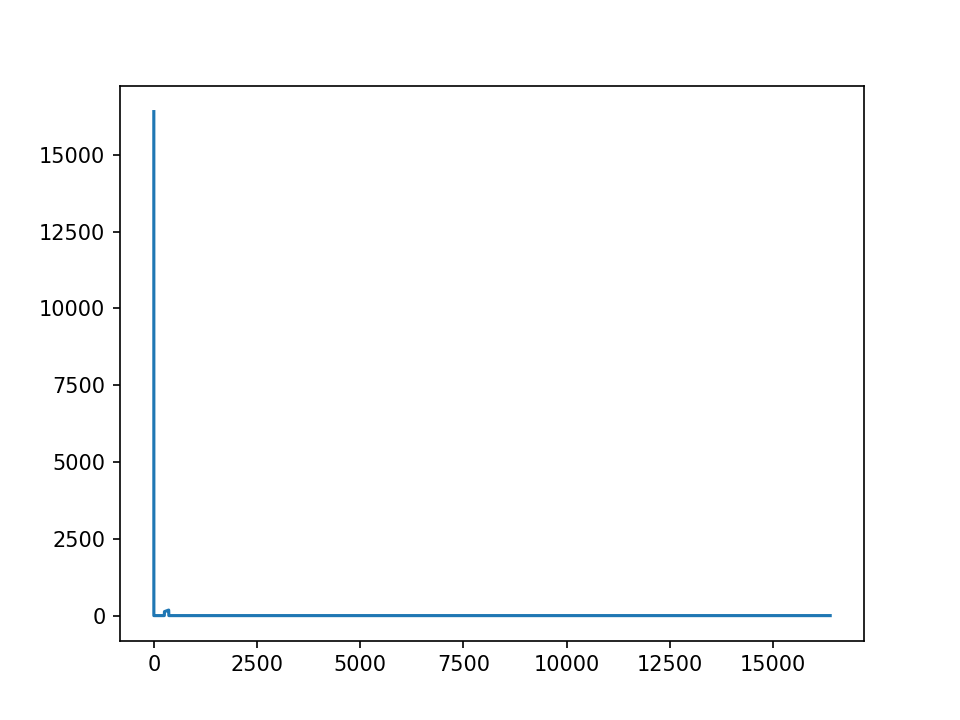

In [66]:
%matplotlib notebook

plt.plot(d.counts)